# Experiments for: "Data-Driven Bayesian Parameter Estimation with Neural Networks"

- Test influence of ``num_simulations`` on posterior distribution


In [2]:
# Import the sbi library and other dependencies
from sbi.inference import SNPE, infer
from sbi.analysis import *
from sbi.utils import *
from simulators.simulator_functions import swing_equation
import sbi
import torch
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

c:\Users\basti\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


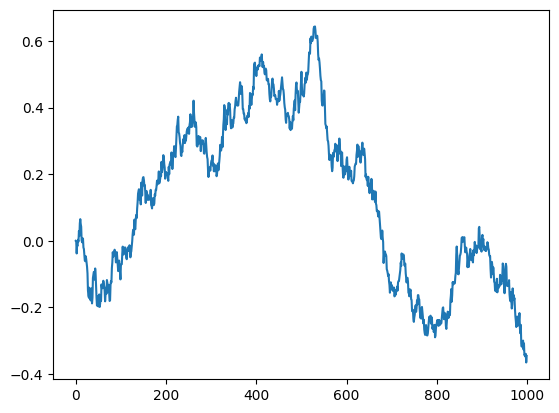

In [9]:
# Define the prior distribution over the parameters H and D
# Use a uniform distribution with lower and upper bounds
prior = sbi.utils.BoxUniform(low=torch.tensor([0.1, 0.1, 0.1, 0.1]), high=torch.tensor([10.0, 10.0, 10.0, 10.0]))

# Define the true parameters for the simulator
theta_true = torch.tensor([0.2, 0.2, 0.2, 0.2])

# Generate observed data using the simulator and true parameters
x_0 = swing_equation(theta_true, T=10)

plt.plot(x_0)

In [14]:
# Define the number of simulations to run for each posterior
num_simulations_options = [100, 1000, 10000]

# Initialize an empty list to store the posteriors
posteriors = []

# For each number of simulations, infer the posterior and add it to the list
for n in num_simulations_options:
    posterior = infer(swing_equation, prior, method='SNPE', num_simulations=n)
    posterior.set_default_x(x_0)
    posteriors.append(posterior)


Running 100 simulations.: 100%|██████████| 100/100 [00:04<00:00, 24.28it/s]


 Neural network successfully converged after 84 epochs.

Running 1000 simulations.: 100%|██████████| 1000/1000 [00:42<00:00, 23.41it/s]


 Neural network successfully converged after 27 epochs.

Running 10000 simulations.: 100%|██████████| 10000/10000 [06:50<00:00, 24.35it/s]


 Neural network successfully converged after 25 epochs.

# Results

- comparison of ``prior``, ``posterior`` and ``theta_true`` with ``num_simulations`` being either 100, 1000 or 10000.

In [30]:
# plot prior and posterior of given parameters
def plot_prior_posterior(prior, posterior, theta_true, path, labels):

    # draw subplots 
    fig, axes = plt.subplots(1, len(labels), figsize=(16,4))  

    for i in range(0, len(labels)):

        # sample 1000 from prior and posterior
        prior_samples = prior.sample((10000,))[:,i]
        posterior_samples = posterior.sample((10000,))[:,i]

        # draw density plot for each parameter using prior
        sns.kdeplot(prior_samples, ax=axes[i], fill=True, label='prior')  
        sns.kdeplot(posterior_samples, ax=axes[i], fill=True, label='posterior')
  
        # label the plots
        axes[i].set_xlabel(labels[i])
        
        # draw true value for comparison
        axes[i].axvline(theta_true[0][i], color='red', label='$\Theta_{true}$')

    # add legend for plot
    axes[len(labels)-1].legend()
    axes[0].set_ylabel('Density')

    # save plot
    plt.tight_layout()
    plt.savefig(path, format="pdf", bbox_inches="tight")
    plt.show()

## Compare ``num_simulations`` influence on posterior distribution

In [1]:
# Define the prefix and suffix for the file path
path_prefix = "../../pdf_out/prior_posterior_ns_"
path_suffix = ".pdf"

# Iterate over each posterior and corresponding number of simulations
for posterior, n in zip(posteriors, num_simulations_options):

    # Construct the full file path by concatenating the prefix, number of simulations, and suffix
    path = path_prefix + str(n) + path_suffix
    
    # Plot the prior and posterior, and save the plot to the specified file path
    plot_prior_posterior(prior, posterior, [theta_true], path, ["$c_1$", "$c_2$", "$P_{const}$", "$\epsilon$"])


NameError: name 'posteriors' is not defined